<a href="https://colab.research.google.com/github/sheshandri/EDA/blob/main/Sparkstask3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TASK 3: Exploratory Data Analysis 

Problem Statement: Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’ .This task is about Exploratory Data Analysis,i.e Retail where the task focuses on a business manager who will try to find out weak areas where he can work to make more profit.



In [3]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
#Loading Dataset
df = pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
#Displaying Bottom 5 Rows
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [ ]:
df.shape

(9994, 13)

In [ ]:
#describing the dataset
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
#checking null values
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [ ]:
#To gain information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [ ]:
#To see the columns of the dataset
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [ ]:
#Analyzing duplicate values and adding them up
df.duplicated().sum()

17

In [ ]:
#Return number of unique elements in the object
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [ ]:
#dropping postal code columns
df = df.drop(['Postal Code'],axis = 1)

#We do this as the values of postal code dosent give any real significance with respect to the target value.
#Its just coordinates of the place

In [ ]:
#Return DataFrame with duplicate rows removed and keeping the first data
df.drop_duplicates(subset=None,keep='first',inplace=True)
df.duplicated().sum()

0

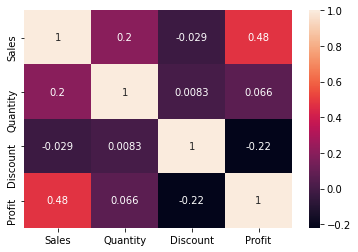

In [ ]:
#Plotting a correlation matrix
corr = df.corr()
sns.heatmap(corr,annot=True)

white: Highly correlated , Black: not correlated at all

### **Profit and Discount are not at all related**

In [ ]:
#Counts the no of rows each feature has
df['Ship Mode'].value_counts()

Standard Class    5930
Second Class      1941
First Class       1531
Same Day           542
Name: Ship Mode, dtype: int64

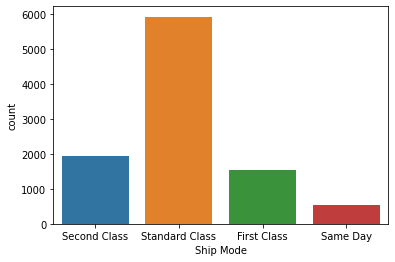

In [ ]:
sns.countplot(x=df['Ship Mode'])

### **Standard Class in "Shipping Mode" Feature has most sales, Same Day has the lowest**

In [ ]:
df['Segment'].value_counts()

Consumer       5160
Corporate      3008
Home Office    1776
Name: Segment, dtype: int64

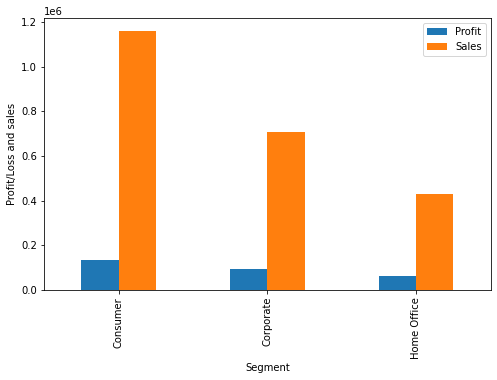

In [ ]:
#We group Segment with profit and sales and plot a bar graph
df.groupby('Segment')[['Profit','Sales']].sum().plot.bar(figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()


### **Consumer consumes the most and has the greatest profit**.

In [ ]:
df['Category'].value_counts()

Office Supplies    5986
Furniture          2114
Technology         1844
Name: Category, dtype: int64

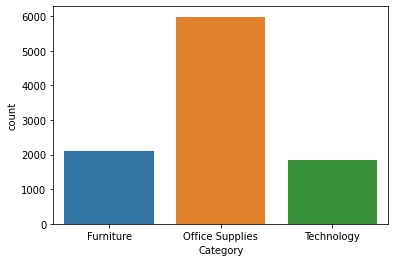

In [ ]:
sns.countplot(x='Category',data=df)

### **Office Supplies are being produced the most**

In [ ]:
df['Sub-Category'].value_counts()

Binders        1518
Paper          1344
Furnishings     954
Phones          888
Storage         845
Art             793
Accessories     773
Chairs          615
Appliances      466
Labels          359
Tables          319
Envelopes       254
Bookcases       226
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

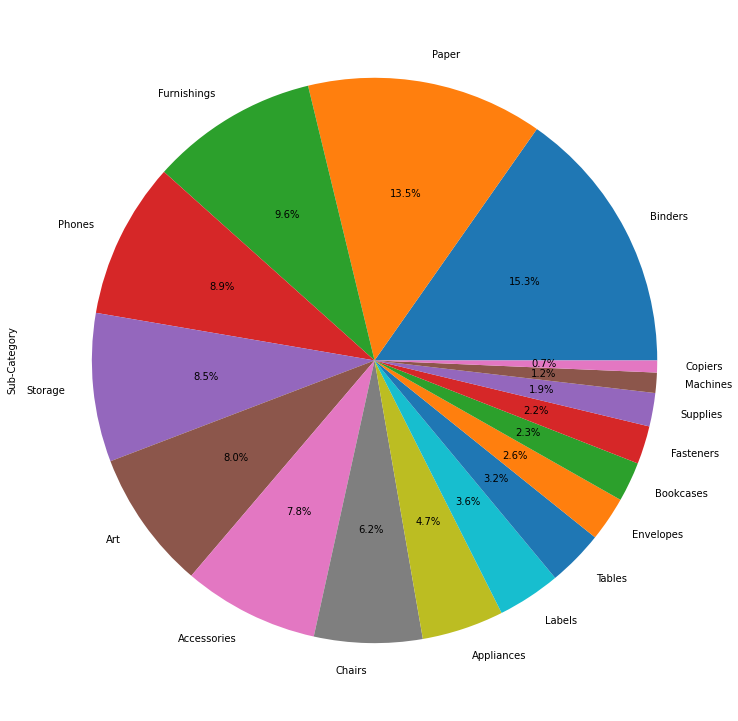

In [ ]:
plt.figure(figsize=(13,13))
df['Sub-Category'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

### **Maximum produced are Binders, Paper, Furnishings, Phones, Storage, Art, Accessories and Minimum produced are Copiers, Machines, Suppliers**

In [ ]:
df['State'].value_counts()

California              1980
New York                1119
Texas                    980
Pennsylvania             581
Washington               502
Illinois                 490
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
Louisiana                 42
South Carolina            42
Nevada        

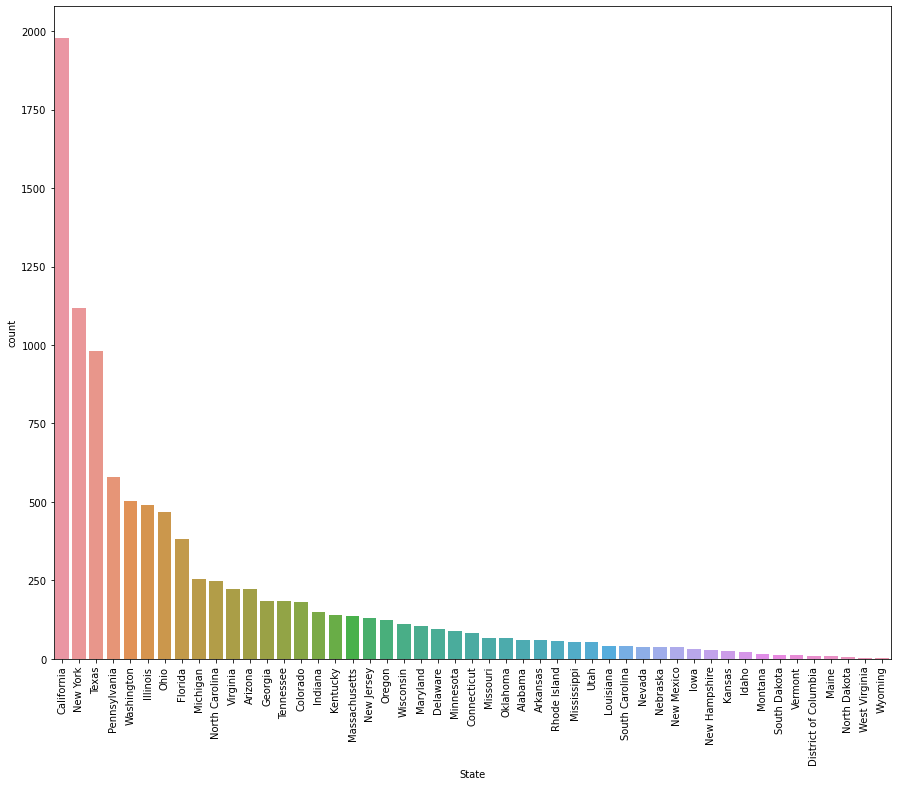

In [ ]:
plt.figure(figsize=(15,12))
sns.countplot(x='State',data=df,order=df['State'].value_counts().index) #assigning countplot with x-labels
plt.xticks(rotation=90)
plt.show()

### **Highest number of buyers are from California and New York**

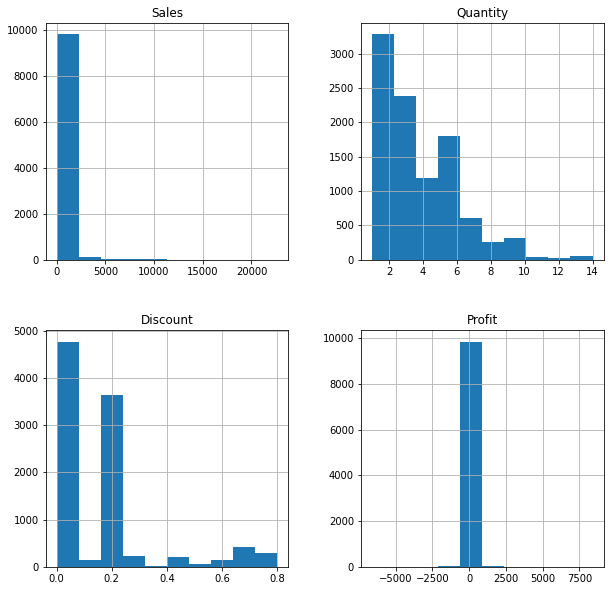

In [ ]:
#Plotting Histogram of all the numerical features
df.hist(figsize=(10,10))
plt.show()

### **Most customers tends to buy quantity of 2 and 3**

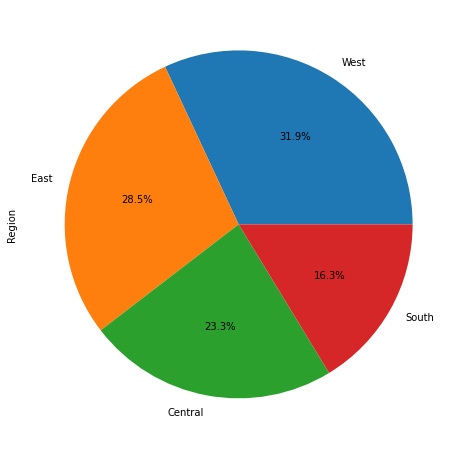

In [ ]:
plt.figure(figsize=(10,8))
df['Region'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.show()

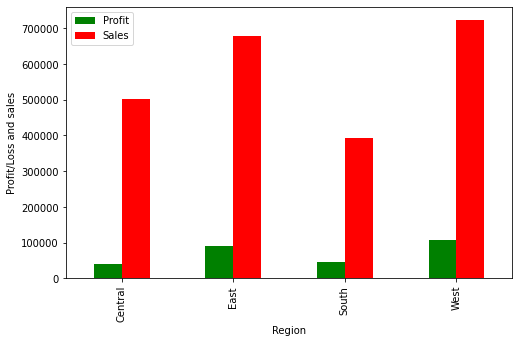

In [ ]:
df.groupby('Region')[['Profit','Sales']].sum().plot.bar(color=['green','red'],figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()

### **Profit and Sales are Maximum in West region and Minimum in South region**

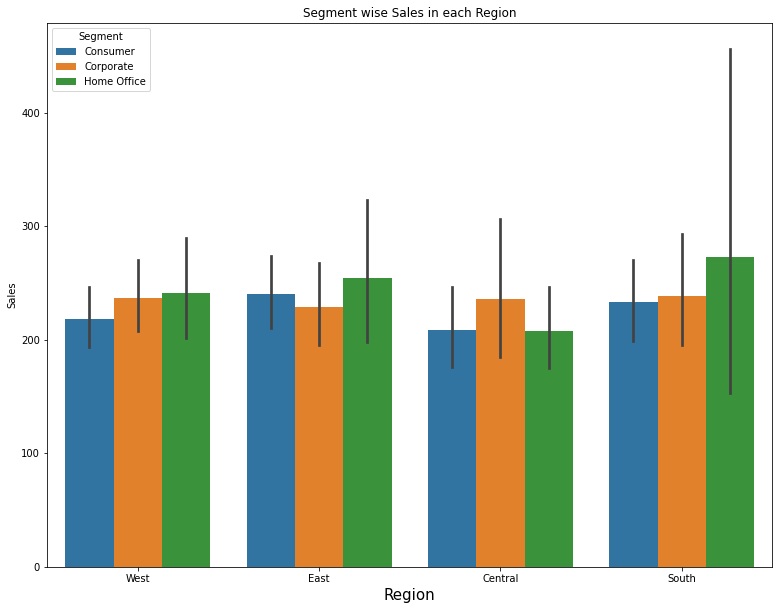

In [ ]:
plt.figure(figsize=(13,10))
plt.title('Segment wise Sales in each Region')
sns.barplot(x='Region',y='Sales',hue='Segment',data=df,order=df['Region'].value_counts().index)
plt.xlabel('Region',fontsize=15)
plt.show()

### **Segment wise sales are almost same in every region**

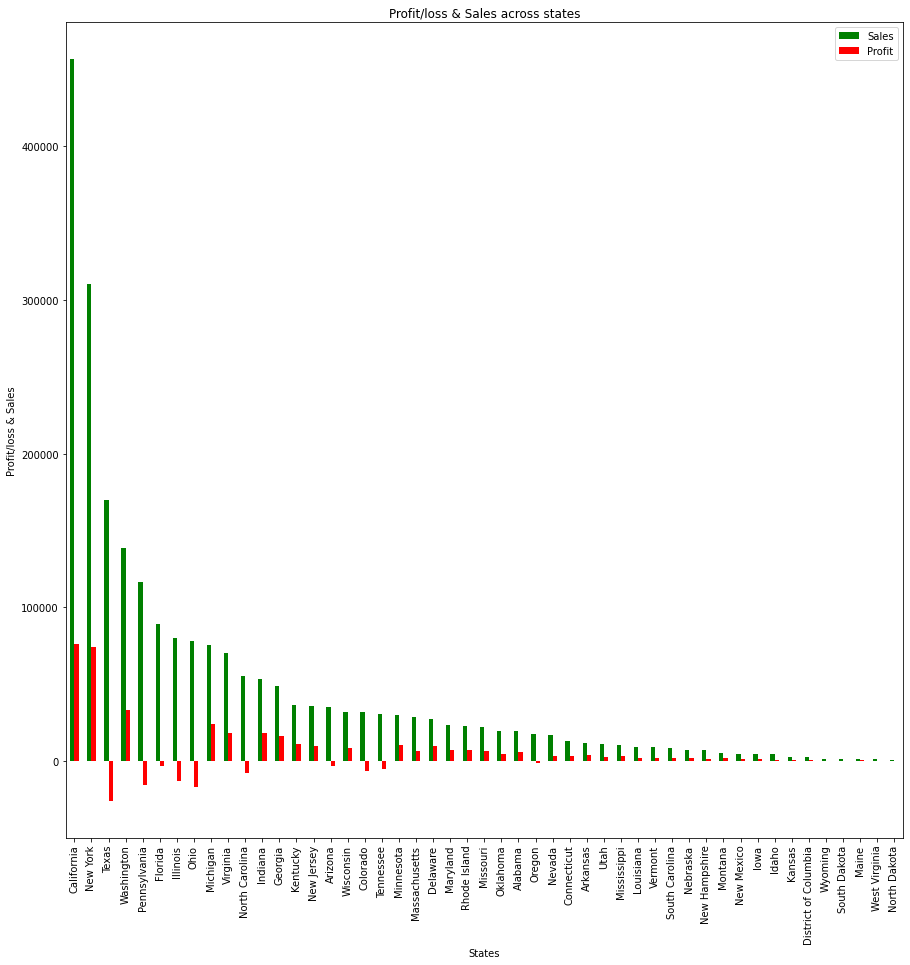

In [ ]:
#State vs Grouped(Pales and Profit), also we are sorting Sales in descending order
proloss = df.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False).plot.bar(color=['green','red'],figsize=(15,15))
plt.title('Profit/loss & Sales across states')
plt.xlabel('States')
plt.ylabel('Profit/loss & Sales')
plt.show()

### **High Profits in California and New York**
### **High Loss for Texas, Pennsylvania, Ohio**

In [5]:

t_states = df['State'].value_counts().nlargest(10)
t_states

California        2001
New York          1128
Texas              985
Pennsylvania       587
Washington         506
Illinois           492
Ohio               469
Florida            383
Michigan           255
North Carolina     249
Name: State, dtype: int64

In [ ]:
df.groupby('Category')[['Profit','Sales']].sum().plot.bar(color=['green','purple'],alpha=1.00,figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()

### **Technology and Office Supplies have high Profits.**
### **Furniture have less Profits**.

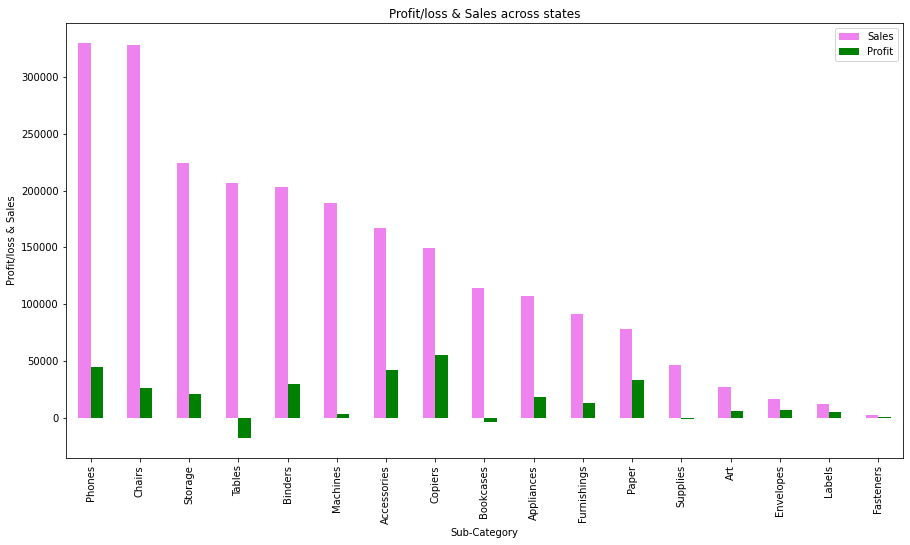

In [ ]:
ps = df.groupby('Sub-Category')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(color=['violet','green'],figsize=(15,8))
plt.title('Profit/loss & Sales across states')
plt.xlabel('Sub-Category')
plt.ylabel('Profit/loss & Sales')
plt.show()

### **Phones Have Highest Sales.**
### **Tables sub-categories are facing huge losses**